Q1 
Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [2]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
# UPLOAD DATA 

df1= pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
# Data size 
df1.shape

(42, 2)

# Visualization 

<AxesSubplot:>

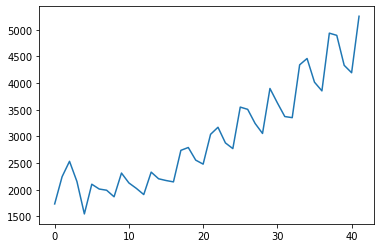

In [5]:
df1['Sales'].plot()

<AxesSubplot:>

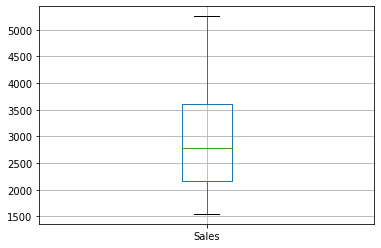

In [6]:
df1.boxplot()

<AxesSubplot:ylabel='Density'>

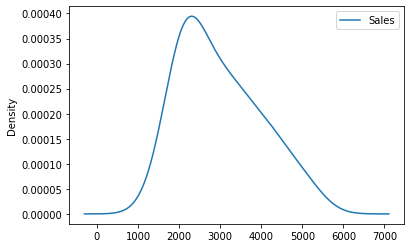

In [7]:
df1.plot(kind='kde')

# Data preprocessing

In [8]:
len(df1)

42

In [9]:
df1['quarter'] = 0
for i in range(42):
    p=df1['Quarter'][i]
    df1['quarter'][i]=p[0:2]
df1

c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [16]:
df_dummies=pd.DataFrame(pd.get_dummies(df1['quarter']),columns=['Q1','Q2','Q3','Q4'])
df2=pd.concat([df1,df_dummies],axis= 1)
df2.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [17]:
df2['t'] = np.arange(1,43)
df2['t_squared'] = df2['t']**2
df2["Sales_log"] =np.log(df1['Sales'])

In [22]:
df2.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [18]:
train =df2.head(32)
test =df2.tail(10)

# Create model

In [20]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

# Linear Model
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse


752.9233932767122

In [23]:
#Quadratic Model
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.73573554073994

In [25]:
# Exponential model
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

* its mean for this data quadric is good model

******************************************************

*********************************************

Q2 
Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# UPLOAD DATA 

df3=pd.read_excel('Airlines+Data.xlsx')
df3

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [88]:
# DATA SIZE

df3.shape

(96, 2)

# data visualization

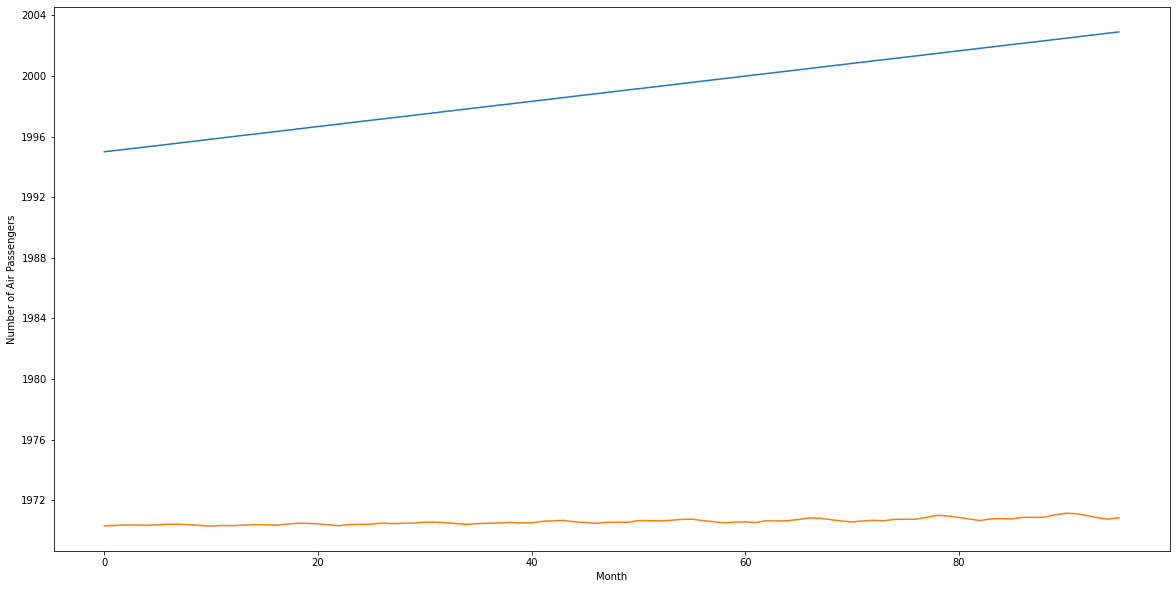

In [107]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df3)

<AxesSubplot:>

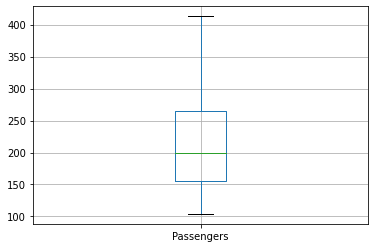

In [90]:
df3.boxplot()

# Upsampling

In [91]:
df4 = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)
df4

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [92]:
df4.shape

(96,)

In [93]:
upsampled = df4.resample('D').mean()
upsampled.head(32)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
1995-01-21      NaN
1995-01-22      NaN
1995-01-23      NaN
1995-01-24      NaN
1995-01-25      NaN
1995-01-26      NaN
1995-01-27      NaN
1995-01-28      NaN
1995-01-29      NaN
1995-01-30      NaN
1995-01-31      NaN
1995-02-01    118.0
Freq: D, Name: Passengers, dtype: float64

In [94]:
upsampled.shape

(2892,)

# interpolate the missing value

In [95]:
interpolated = upsampled.interpolate(method = 'linear')
interpolated.head(32)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
1995-01-31    117.806452
1995-02-01    118.000000
Freq: D, Name: Passengers, dtype: float64

In [96]:
type(interpolated)

pandas.core.series.Series

In [97]:
# convert into data frame 
df5 = interpolated.to_frame(name='Passengers')

In [98]:
df5

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


In [99]:
# add two columns
df5['t'] = np.arange(1,2893)
df5['t_squared'] = df5['t']**2
df5['Passengers_log']=np.log(df5['Passengers'])

In [100]:
df5

,Passengers,t,t_squared,Passengers_log
Month,,,,
1995-01-01,112.000000,1,1,4.718499
1995-01-02,112.193548,2,4,4.720225
1995-01-03,112.387097,3,9,4.721949
1995-01-04,112.580645,4,16,4.723670
1995-01-05,112.774194,5,25,4.725388
...,...,...,...,...
2002-11-27,301.333333,2888,8340544,5.708217
2002-11-28,302.500000,2889,8346321,5.712081
2002-11-29,303.666667,2890,8352100,5.715931


In [101]:
# spliting data into train test 

train1 =df5.head(2500)
test1 =df5.tail(392)

# Model

In [102]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

# Linear Model
linear_model1 =smf.ols("Passengers~t",data =train1).fit()
linear_pred1 = pd.Series(linear_model1.predict(test['t']))
linear_rmse1 =np.sqrt(mean_squared_error(np.array(test1['Passengers']),np.array(linear_pred1)))
linear_rmse1


49.509090013753685

In [103]:
#Quadratic Model
quad_model2 =smf.ols("Passengers~t+t_squared",data=train1).fit()
quad_pred2 = pd.Series(quad_model.predict(test1[['t','t_squared']]))
quad_rmse2 =np.sqrt(mean_squared_error(np.array(test1['Passengers']),np.array(quad_pred)))
quad_rmse2

43.95901626845906

In [106]:
quad_model2.rsquared

0.8110987595554362